In [1]:
# Wczytanie danych z keras
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 316s 27us/step


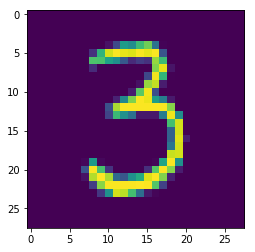

In [2]:
# Przykładoway obrazek
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[50])

In [3]:
# Rozmiar zbioru
# ilość przykladów, wys. w px, szer. w px
X_train.shape

(60000, 28, 28)

In [4]:
# Zwiększenie wymiaru danych o wymiar koloru
X_train_reshaped = X_train.reshape(60000, 28, 28, 1)
X_test_reshaped = X_test.reshape(10000, 28, 28, 1)

In [5]:
# Zamiana na wartości binarne
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Budowa sieci

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [9]:
# Kompilacja modelu
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
# Trenowanie modelu
model.fit(
    X_train_reshaped, y_train,
    epochs=1,
    batch_size=128,
    validation_data=(X_test_reshaped, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 84s 1ms/step - loss: 1.5959 - acc: 0.8494 - val_loss: 0.0652 - val_acc: 0.9790


In [12]:
# Badanie skuteczności na zbiorze testowym
score = model.evaluate(X_test_reshaped, y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  0.06524049886629218
Test accuracy:  0.979


6


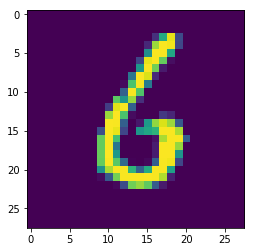

In [21]:
# Predykcja na przykładowym zdjeciu z zbioru testowgo
import numpy as np
plt.imshow(X_test[50])
example = np.expand_dims(X_test_reshaped[50], axis=0)
prediction = model.predict(example)
print(np.argmax(prediction))